#### Download Assets

In [5]:
urls = ["https://github.com/ravindusenavirathna/Intensity-Transformations-and-Neighborhood-Filtering/blob/bb29f06b207f8ec7f7c49c9e13f4115da8db2669/assets/runway.png",
        "https://github.com/ravindusenavirathna/Intensity-Transformations-and-Neighborhood-Filtering/blob/776ac4a3970e6f3b577c2b457b9685780bea60ae/assets/emma_salt_pepper.jpg",
        "https://github.com/ravindusenavirathna/Intensity-Transformations-and-Neighborhood-Filtering/blob/776ac4a3970e6f3b577c2b457b9685780bea60ae/assets/highlights_and_shadows.jpg",
        "https://github.com/ravindusenavirathna/Intensity-Transformations-and-Neighborhood-Filtering/blob/776ac4a3970e6f3b577c2b457b9685780bea60ae/assets/looking_out.jpg"]

for url in urls:
    raw_url = url.replace("github.com", "raw.githubusercontent.com").replace("/blob/", "/")
    !wget -q {raw_url} -O {raw_url.split("/")[-1]}

!ls *.jpg *.png

emma_salt_pepper.jpg	    looking_out.jpg  solution_q1.png
highlights_and_shadows.jpg  runway.png


#### Import Libraries

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Question 01

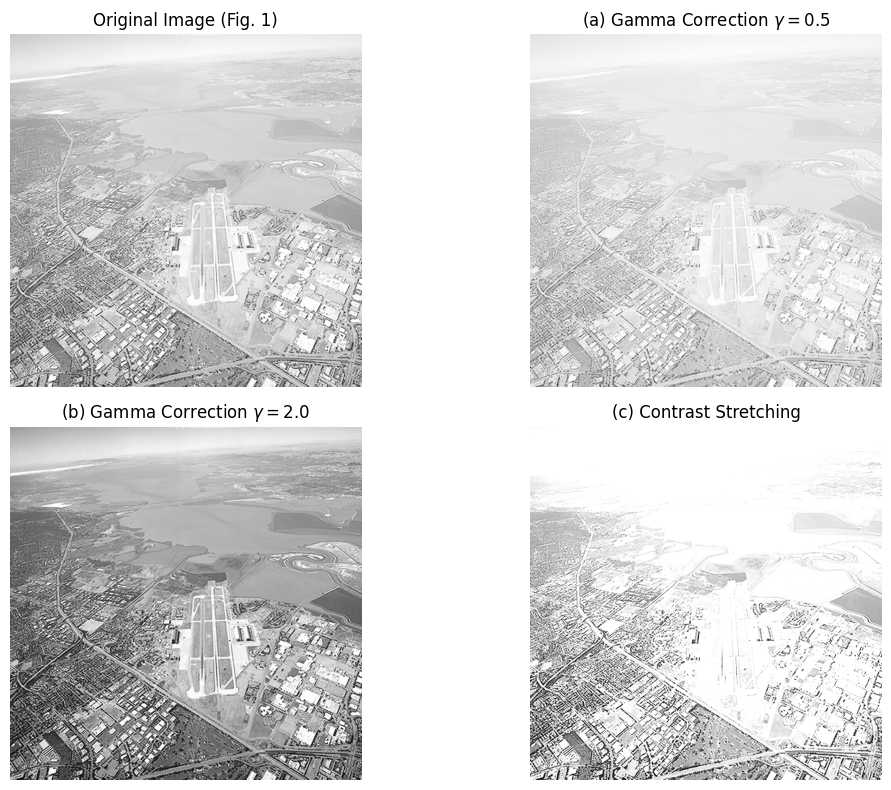

In [ ]:
# 1. Load the image in Grayscale
img = cv2.imread('runway.png', cv2.IMREAD_GRAYSCALE)

# Normalize pixel values to range [0, 1] for mathematical operations
r = img / 255.0

# ---------------------------------------------------------
# (a) Gamma Correction with gamma = 0.5 (Brightening)
# Formula: s = r ^ 0.5
# ---------------------------------------------------------
gamma_a = 0.5
s_a = np.power(r, gamma_a)
# Convert back to [0, 255] for display
img_gamma_05 = np.uint8(np.clip(s_a * 255, 0, 255))

# ---------------------------------------------------------
# (b) Gamma Correction with gamma = 2.0 (Darkening)
# Formula: s = r ^ 2.0
# ---------------------------------------------------------
gamma_b = 2.0
s_b = np.power(r, gamma_b)
# Convert back to [0, 255] for display
img_gamma_2 = np.uint8(np.clip(s_b * 255, 0, 255))

# ---------------------------------------------------------
# (c) Contrast Stretching (Piecewise Linear)
# r1 = 0.2, r2 = 0.8
# ---------------------------------------------------------
r1 = 0.2
r2 = 0.8

# Initialize output array
s_c = np.zeros_like(r)

# Apply the piecewise conditions vectorized:

# 1. r < r1 -> 0
# (Already 0 from initialization)

# 2. r1 <= r <= r2 -> Scale linearly: (r - r1) / (r2 - r1)
mask_middle = (r >= r1) & (r <= r2)
s_c[mask_middle] = (r[mask_middle] - r1) / (r2 - r1)

# 3. r > r2 -> 1
mask_upper = (r > r2)
s_c[mask_upper] = 1.0

# Convert back to [0, 255]
img_contrast = np.uint8(np.clip(s_c * 255, 0, 255))

# ---------------------------------------------------------
# Visualization
# ---------------------------------------------------------
plt.figure(figsize=(12, 8))

# Original
plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title('Original Image (Fig. 1)')
plt.axis('off')

# Gamma = 0.5
plt.subplot(2, 2, 2)
plt.imshow(img_gamma_05, cmap='gray', vmin=0, vmax=255)
plt.title(r'(a) Gamma Correction $\gamma=0.5$')
plt.axis('off')

# Gamma = 2.0
plt.subplot(2, 2, 3)
plt.imshow(img_gamma_2, cmap='gray', vmin=0, vmax=255)
plt.title(r'(b) Gamma Correction $\gamma=2.0$')
plt.axis('off')

# Contrast Stretching
plt.subplot(2, 2, 4)
plt.imshow(img_contrast, cmap='gray', vmin=0, vmax=255)
plt.title('(c) Contrast Stretching')
plt.axis('off')

plt.tight_layout()

plt.show()

# Question 02

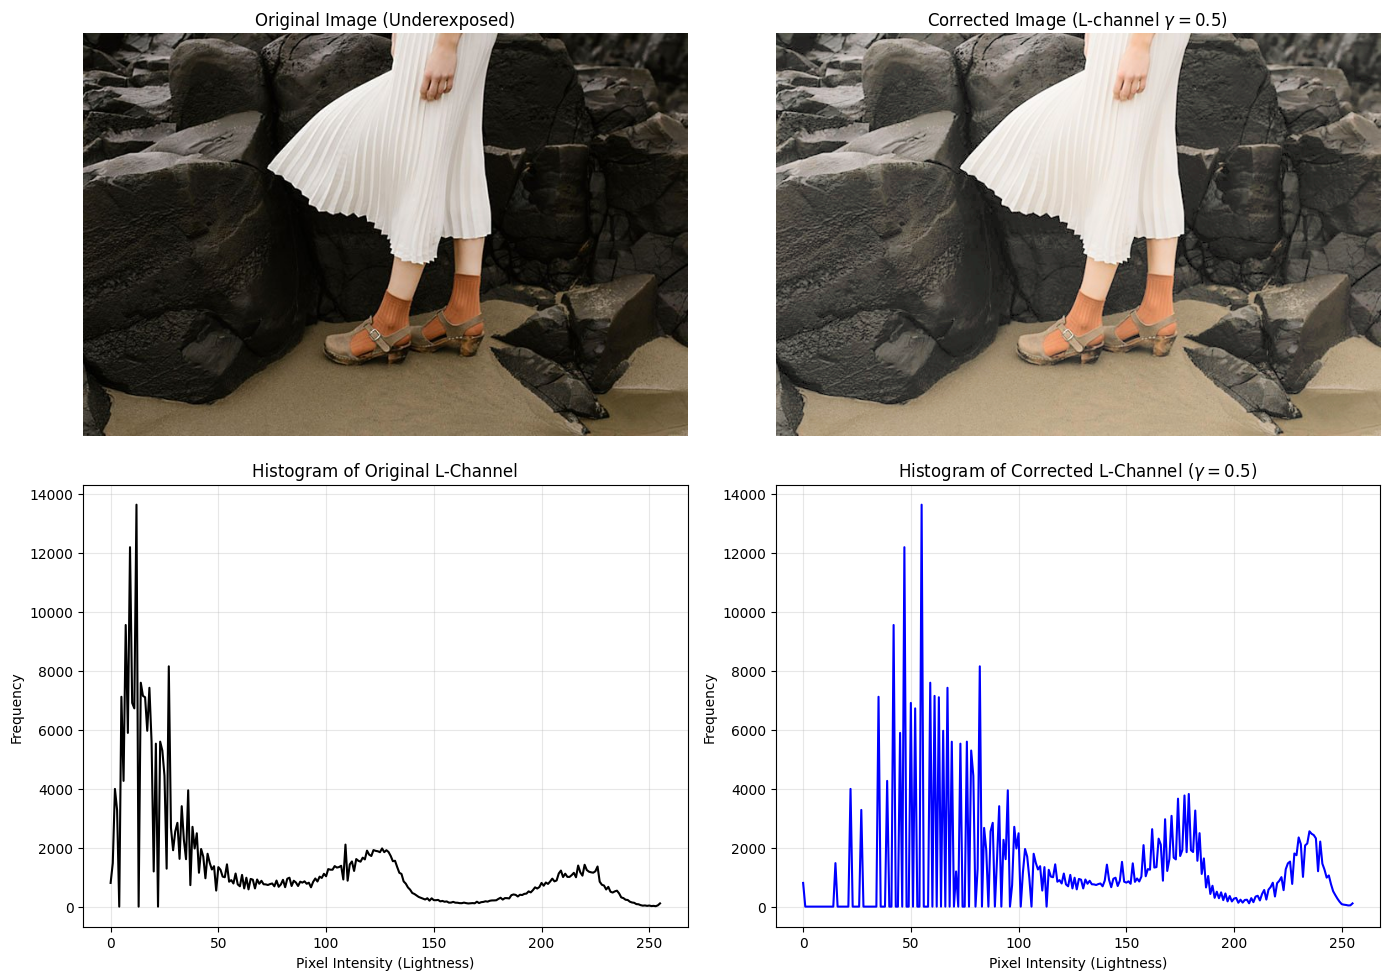

In [11]:
gamma_value = 0.5

# 1. Load the original image
img_bgr = cv2.imread('highlights_and_shadows.jpg')

# 2. Convert from BGR to CIE L*a*b* color space
img_lab = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2LAB)

# Split the channels
l_channel, a_channel, b_channel = cv2.split(img_lab)

# 3. Apply Gamma Correction to the L (Lightness) channel
# Normalize L to [0, 1] for the math
l_norm = l_channel / 255.0
l_corrected_norm = np.power(l_norm, gamma_value)
# Scale back to [0, 255] and convert to uint8
l_new = np.uint8(np.clip(l_corrected_norm * 255, 0, 255))

# 4. Merge the channels back together
# Use the new L channel with the original a and b channels
img_lab_corrected = cv2.merge((l_new, a_channel, b_channel))

# Convert back to BGR, then to RGB for matplotlib display
img_corrected_bgr = cv2.cvtColor(img_lab_corrected, cv2.COLOR_LAB2BGR)
img_corrected_rgb = cv2.cvtColor(img_corrected_bgr, cv2.COLOR_BGR2RGB)
img_original_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# 5. Compute Histograms for the L channel
# We compare the distribution of Lightness before and after
hist_original = cv2.calcHist([l_channel], [0], None, [256], [0, 256])
hist_corrected = cv2.calcHist([l_new], [0], None, [256], [0, 256])

# ---------------------------------------------------------
# Visualization
# ---------------------------------------------------------
plt.figure(figsize=(14, 10))

# (a) Original Image
plt.subplot(2, 2, 1)
plt.imshow(img_original_rgb)
plt.title('Original Image (Underexposed)')
plt.axis('off')

# (b) Corrected Image
# Note: rf'' handles the backslash for the gamma symbol correctly
plt.subplot(2, 2, 2)
plt.imshow(img_corrected_rgb)
plt.title(rf'Corrected Image (L-channel $\gamma={gamma_value}$)')
plt.axis('off')

# (c) Histogram: Original
plt.subplot(2, 2, 3)
plt.plot(hist_original, color='black')
plt.title('Histogram of Original L-Channel')
plt.xlabel('Pixel Intensity (Lightness)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

# (d) Histogram: Corrected
plt.subplot(2, 2, 4)
plt.plot(hist_corrected, color='blue')
plt.title(rf'Histogram of Corrected L-Channel ($\gamma={gamma_value}$)')
plt.xlabel('Pixel Intensity (Lightness)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

plt.tight_layout()

plt.show()

# Question 03

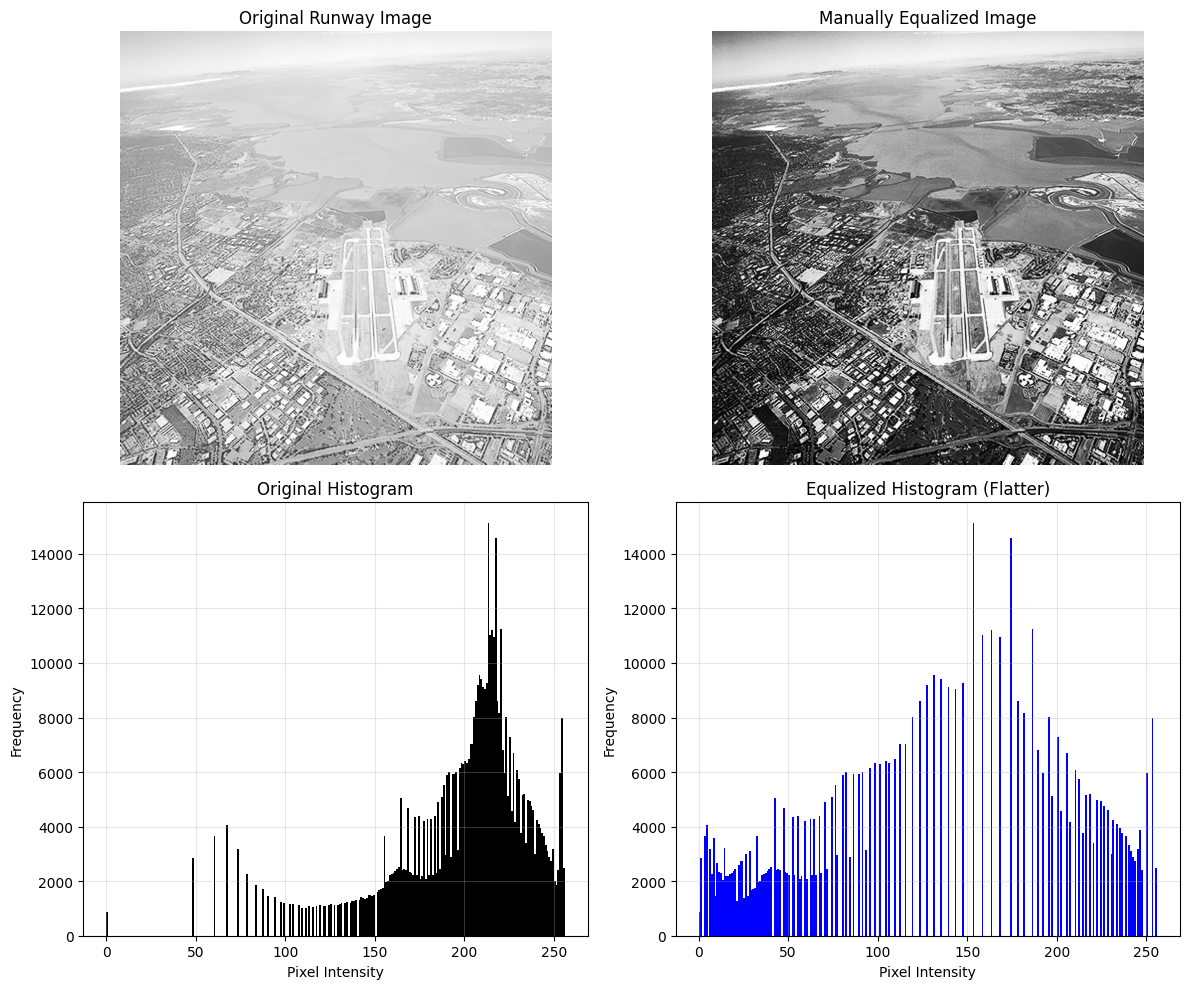

In [ ]:
# 1. Load the image in Grayscale
img = cv2.imread('runway.png', cv2.IMREAD_GRAYSCALE)

# ---------------------------------------------------------
# Manual Histogram Equalization Implementation
# ---------------------------------------------------------

# Step A: Calculate the Histogram
# We count the frequency of each pixel intensity (0-255)
# Note: np.histogram also takes 'bins' and 'range'
hist, bins = np.histogram(img.flatten(), bins=256, range=[0, 256])

# Step B: Calculate the Cumulative Distribution Function (CDF)
# cdf[i] is the sum of all counts <= i
cdf = hist.cumsum()

# Step C: Normalize the CDF to the range [0, 255]
# Formula: s_k = floor( (L-1) * CDF(r_k) ) where CDF is normalized to [0,1]
# We perform it in one step: (cdf / total_pixels) * 255
cdf_normalized = (cdf * 255) / cdf.max()

# Step D: Create a Lookup Table (LUT)
# Map the input pixel values to the new equalized values
lookup_table = np.uint8(cdf_normalized)

# Step E: Apply the LUT to the image
# This replaces every pixel 'v' with 'lookup_table[v]'
img_equalized_manual = lookup_table[img]

# ---------------------------------------------------------
# Validation (Optional comparison with OpenCV)
# ---------------------------------------------------------
# img_equalized_opencv = cv2.equalizeHist(img)

# ---------------------------------------------------------
# Visualization
# ---------------------------------------------------------
plt.figure(figsize=(12, 10))

# 1. Original Image
plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title('Original Runway Image')
plt.axis('off')

# 2. Equalized Image (Manual)
plt.subplot(2, 2, 2)
plt.imshow(img_equalized_manual, cmap='gray', vmin=0, vmax=255)
plt.title('Manually Equalized Image')
plt.axis('off')

# 3. Histogram: Original
plt.subplot(2, 2, 3)
# FIX: Explicitly name 'bins' and 'range' to avoid DeprecationWarning
plt.hist(img.flatten(), bins=256, range=[0, 256], color='black')
plt.title('Original Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

# 4. Histogram: Equalized
plt.subplot(2, 2, 4)
# FIX: Explicitly name 'bins' and 'range'
plt.hist(img_equalized_manual.flatten(), bins=256, range=[0, 256], color='blue')
plt.title('Equalized Histogram (Flatter)')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

plt.tight_layout()

plt.show()

# Question 04

Otsu's calculated threshold value: 101.0


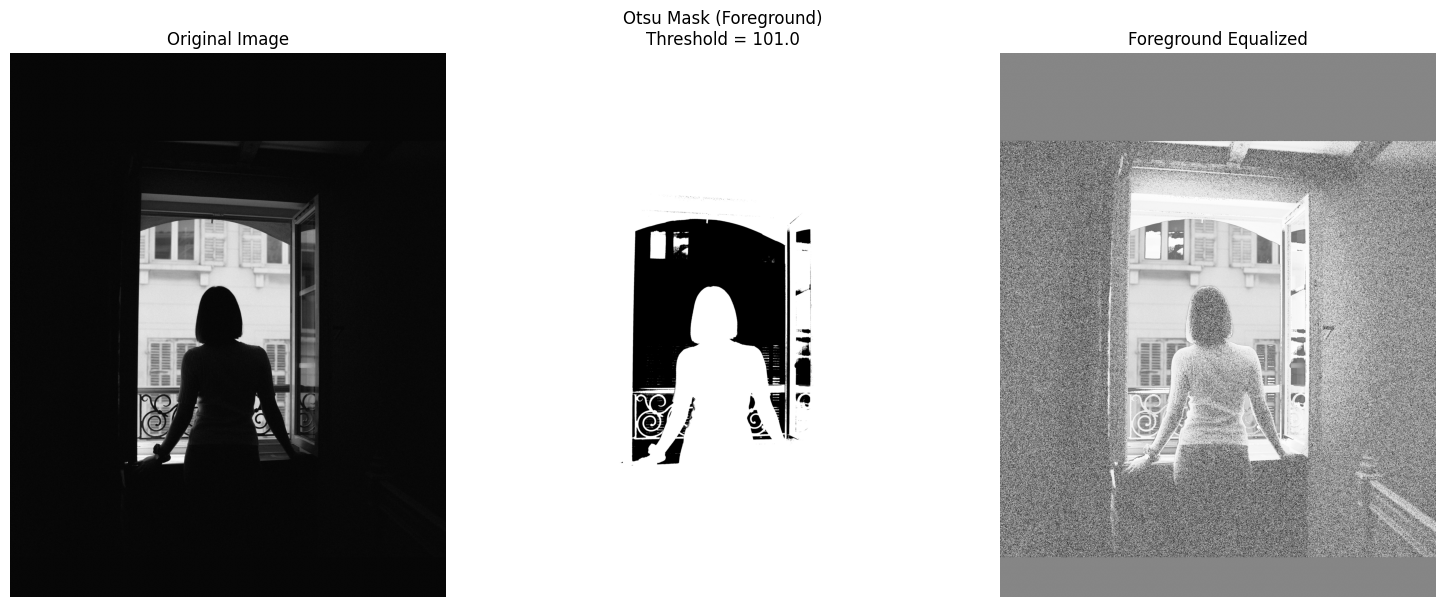

In [16]:
# 1. Load the image in Grayscale
img = cv2.imread('looking_out.jpg', cv2.IMREAD_GRAYSCALE)

# 2. (a) Otsu Thresholding
# We want the 'foreground' (woman + room) which is DARK.
# The background (window) is BRIGHT.
# Standard THRESH_BINARY sets bright pixels > Threshold to 255.
# We need the opposite: pixels < Threshold should be 255 (the mask).
otsu_threshold, mask = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

print(f"Otsu's calculated threshold value: {otsu_threshold}")

# 3. (b) Histogram Equalization on Foreground Only
# We cannot use cv2.equalizeHist() directly because it uses the whole image.
# We must perform equalization manually on the masked pixels.

# Step A: Get all pixel values that are part of the mask
foreground_pixels = img[mask == 255]

# Step B: Calculate Histogram & CDF for these specific pixels
hist, bins = np.histogram(foreground_pixels.flatten(), bins=256, range=[0, 256])
cdf = hist.cumsum()

# Step C: Normalize CDF to [0, 255]
# Use the masked min/max to stretch properly
# Mask zeros to ignore background contribution
cdf_m = np.ma.masked_equal(cdf, 0)
cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
cdf_final = np.ma.filled(cdf_m, 0).astype('uint8')

# Step D: Apply the equalization
# Create a copy of the original image
img_equalized = img.copy()
# Map the foreground pixels to their new values using the CDF lookup
img_equalized[mask == 255] = cdf_final[img[mask == 255]]

# ---------------------------------------------------------
# Visualization
# ---------------------------------------------------------
plt.figure(figsize=(15, 6))

# Original
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title('Original Image')
plt.axis('off')

# Binary Mask
plt.subplot(1, 3, 2)
plt.imshow(mask, cmap='gray', vmin=0, vmax=255)
plt.title(f'Otsu Mask (Foreground)\nThreshold = {otsu_threshold}')
plt.axis('off')

# Result
plt.subplot(1, 3, 3)
plt.imshow(img_equalized, cmap='gray', vmin=0, vmax=255)
plt.title('Foreground Equalized')
plt.axis('off')

plt.tight_layout()

plt.show()